In [1]:
from imp import reload
import sys
print(sys.version)
# import rpy2
import os
import os.path
import glob
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.stats.api as sms
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
# Use Type 1 fonts in plots.
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# Do not wrap long lines
np.set_printoptions(linewidth=np.nan)
sns.set_style("whitegrid")
import runner
import umm

3.7.5 (default, Nov  1 2019, 02:16:23) 
[Clang 11.0.0 (clang-1100.0.33.8)]


# Plotting the results of the experiments in the paper 
## Which value of $r_1$ (ratio_samples_learn) and $r_2$ (weight_samples_learn) is the best for each instance?

The learning rate $\rho$ (uBorda parameter) is **not** set manually. Instead, we use these two parameters to obtain a more interpretable setting: The value of $\rho$ is set at each iteration and depends on the set of function evaluations $F$. Parameter $\rho$ is set such that the largest $r_1$\% of the mass of the weights is concentrated in the best $r_2$\% of the solutions in $S$, i.e., 

$$
r_1 \sum_{\sigma\in S}\rho^{f(\sigma)} =  \sum_{\sigma\in S'}\rho^{f(\sigma)} \text{where} |S'| = r_2|S| \land \forall \sigma'\in S', \sigma\in S\setminus S' : f(\sigma')\geq f(\sigma)
$$


Therefore, for each instance, we plot the mean of the best fitnesses over 10 repetitions as a function of $r_1$ and $r_2$. Since we are minimizing, the lower the better. 

Overall, the values ($r_1, r_2$)=(.1,.9) have good performance, we will use this configuration for the rest of the experimental section. 

For the LOP instances (synthetic and real) the best fitness function changes smoothly when we change the parameters
For the QAP and PFSP this does not happen, meaning that the convergence to the optimal is not smooth

The following two cells perform the experiments, in particular:
- the first one run the whole combination of parameters (beware that this takes long because they are lots of executions) and we do not recomment to run here and
- the second one processes the results and generates the plots

In [3]:
# dfselected = pd.read_csv('./best_fitness_selected.txt',sep='\t')
# lis = []
# for inst in dfselected.instance_name.values:#collect all the instance paths
#   for folder in ['./lop/','./pfsp/', './qap/']: 
#       for dirpath, dirnames, filenames in os.walk(folder):
#           for filename in [f for f in filenames ]:
#             if inst in os.path.join(dirpath, filename):
#                 lis.append(os.path.join(dirpath, filename))    
# budget=40#0
# m_ini=10
# budgetMM=10
# res = []
# for instance_name in lis:
#   for r1 in [.1,.2,.3,.4,.5]:
#     for r2 in [.6,.7,.8,.9,.99]:
#       for seed in range(1):
#         out_filename = "pickles/"+instance_name.replace("/", "__").replace(".txt", "")
#         df = runner.run_once("UMM", instance_name, seed,budget = budget, m_ini = m_ini, budgetMM = budgetMM, 
#                              ratio_samples_learn = r1, weight_mass_learn = r2, out_filename = out_filename)
#         print(out_filename,r1, r2,df.Fitness.min())
#         res.append([out_filename,ratio_samples_learn, weight_mass_learn,df.Fitness.min()])
#         #os.remove(out_filename)
# FIXME: This does not generate results/results.csv

findfont: Font family ['sans-serif'] not found. Falling back to Helvetica.


qap/kra30a.dat


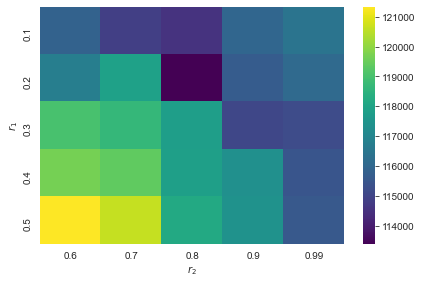

qap/kra30b.dat


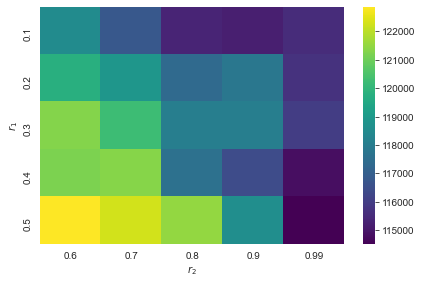

qap/nug30.dat


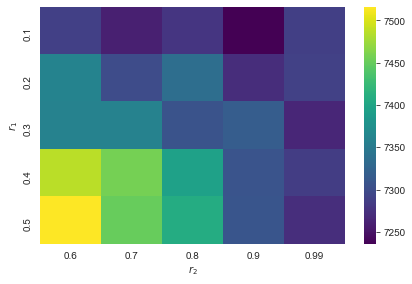

qap/tho30.dat


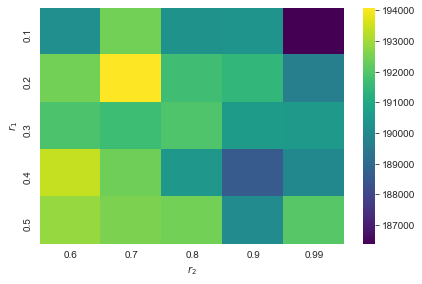

pfsp/rec13.txt


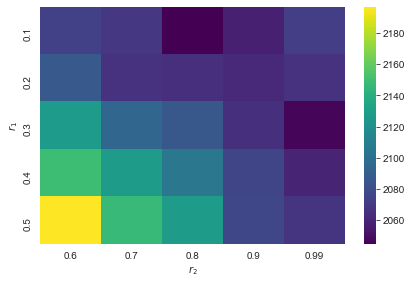

pfsp/rec19.txt


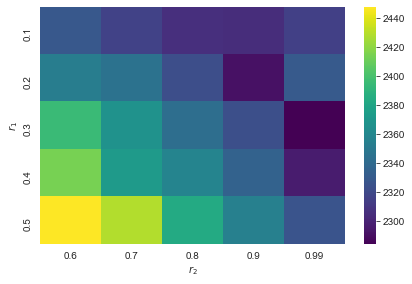

lop/RandB/N-p40-02


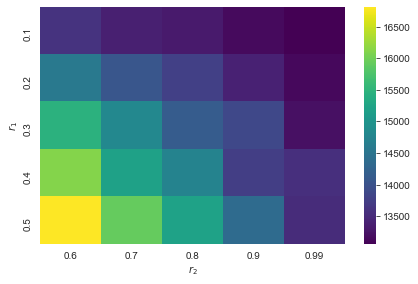

lop/IO/N-t59d11xx


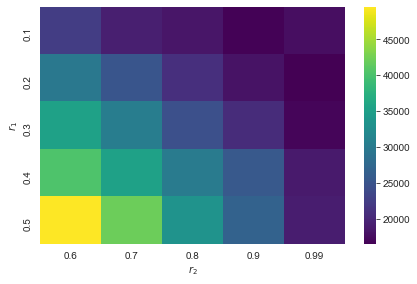

lop/SGB/N-sgb75.02


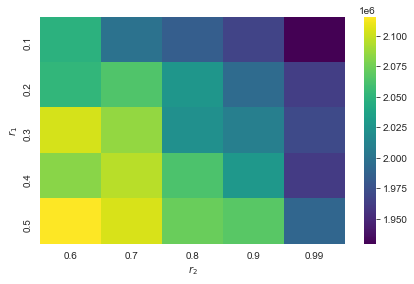

lop/xLOLIB/N-be75eec_150


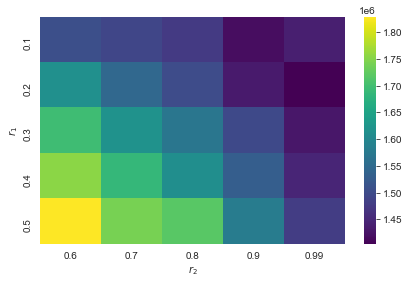

LOP-synthetic


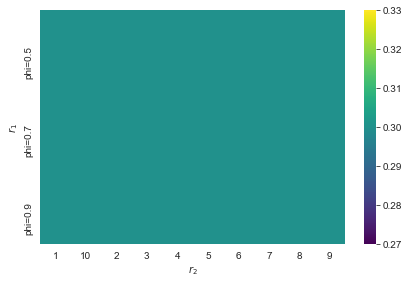

In [6]:
df = pd.read_csv('results-er0/tuning.csv', header=None, sep='\n')
df = df[0].str.split(',', expand=True)
df.columns = df.iloc[0]
df = df[1:]
df = df[[  'instance',       'seed',  'umm_m_ini',   'budgetMM',        'r_1', 'r_2',     'budget', 'eval_ranks',    'fitness']]
df#df = pd.pivot_table(df,index=['filename','ratio','weight'],values='best',aggfunc={np.mean,np.min, np.std})#.reset_index()
# df['fitness'].astype(float).
df['Fitness'] = df['fitness'].astype(float)
df = df.drop('fitness',axis=1)
for insta in df.instance.drop_duplicates():
  print(insta)
  aux = df[df.instance==insta]
  sns.heatmap(aux.pivot_table(index='r_1', columns='r_2', values='Fitness'), cmap="viridis")
  plt.tight_layout()
  plt.xlabel(r'$r_2$')
  plt.ylabel(r'$r_1$')
  plt.savefig('img/heatmap_' + insta.replace('/','_').replace('.','_') + '.pdf')
  plt.show()

In [30]:
gr = df.groupby(['instance','r_1','r_2']).mean()#.reset_index()
gr = gr.drop('LOP-synthetic')
gr = gr.groupby('instance').rank()#.to_csv('ranks.csv')
gr.groupby(['r_1','r_2']).mean().reset_index().sort_values(by='Fitness')

,r_1,r_2,Fitness
3,0.1,0.9,4.00
14,0.3,0.99,4.30
2,0.1,0.8,4.90
19,0.4,0.99,5.00
4,0.1,0.99,5.50
9,0.2,0.99,5.80
8,0.2,0.9,6.70
24,0.5,0.99,8.10
1,0.1,0.7,8.50
7,0.2,0.8,10.10


ParserError: Error tokenizing data. C error: Expected 9 fields in line 300, saw 17


## Synthetic datasets (LOP)


  The instances $M$ follow this distribution $M_\phi[i,j]$
  $$M_\phi[i,j] = h(j-i+1,\phi) - h(j-i,\phi),$$ where $$h(k,\phi)=\frac{k}{1-\phi^k} \enspace.$$
  
Taking different values of $\phi$ we controll the uniformity of $M$.
  
In the next cell we plot the results over the synthetic instances

## Real datasets (LOP, QAP, PFSP)
In the following lines we load the results of the real dataset for CEGO and UMM, plot the results and make the comparison table

In [3]:
dfbest = pd.read_csv('best_fitness_selected.csv',sep=';')
def get_opt(instpath):
  instance_name = instpath.split('/')[-1].replace('.dat','').replace('.txt','')
  sol = dfbest[dfbest.instance_name==instance_name]#.best_known_subdiagonal.values
  if len(sol)!=1: 
    print("No opt value")
    return np.nan
  if sol.best_known_subdiagonal.iloc[0] is not None: return sol.best_known_subdiagonal.iloc[0]
  return sol.best_known.iloc[0]
    

  # Compare synthetic data in the same plot.
# Compare the convergence to lowest fitness funtion values by the two solvers
lis = []
for filename in glob.glob("./results/**/*.pkl.*z", recursive=True): lis.append(pd.read_pickle(filename))
# for filename in glob.glob("./results-er*/*/*/*.pkl.*z"): lis.append(pd.read_pickle(filename))
dfreal = pd.concat(lis, sort = True)
dfreal['Uniformity'] = dfreal.instance.str.extract(r'phi=(.+)$').astype(float)
assert((dfreal.groupby(['Solver', 'instance'])['seed'].nunique() == 10).all())
dfreal


AssertionError: 

In [ ]:
# dfbest = pd.read_csv('best_fitness_selected.csv',sep=';')
# run_instances = dfreal.instance.drop_duplicates()
# for indi,row in dfbest.iterrows():
#   best_fitness = np.nan
#   if row.problem == 'LOP':
#     inst_path = find_in_lop_folder(row.instance_name, ret_value='path')
# #     print( row.best_known +1)
#     with open(inst_path) as f:
#       n = int(f.readline().strip())
#       matrix = np.loadtxt(f, max_rows=n)
#       best_fitness = matrix.sum() -  float(row.best_known)
#   print(row.problem, row.instance_name, row.best_known, best_fitness, sep='\t') 
# #   print(inst,get_opt(inst),best_fitness)

    

Instance:  lop/IO/N-t59d11xx
lop/IO/N-t59d11xx 9000.0
Saving to img/fitness_real_lop_IO_N-t59d11xx.pdf


findfont: Font family ['sans-serif'] not found. Falling back to Helvetica.
findfont: Font family ['sans-serif'] not found. Falling back to Helvetica.
findfont: Font family ['sans-serif'] not found. Falling back to Helvetica.
findfont: Font family ['sans-serif'] not found. Falling back to Helvetica.


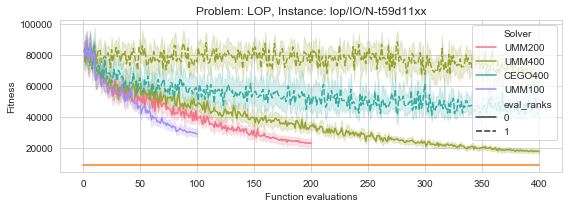

Instance:  lop/IO/N-t59b11xx
lop/IO/N-t59b11xx 93140.0
Saving to img/fitness_real_lop_IO_N-t59b11xx.pdf


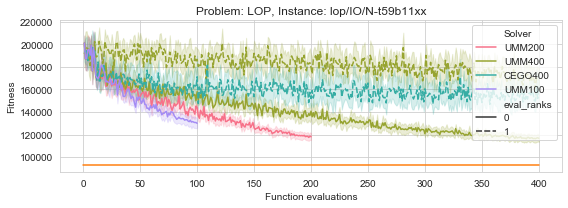

Instance:  lop/SGB/N-sgb75.01
lop/SGB/N-sgb75.01 1632977.0
Saving to img/fitness_real_lop_SGB_N-sgb75_01.pdf


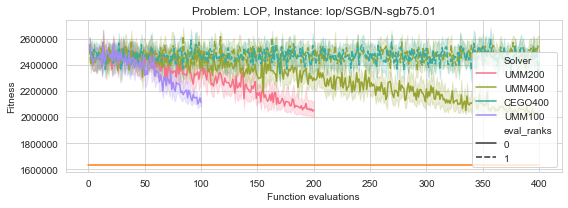

Instance:  lop/SGB/N-sgb75.02
lop/SGB/N-sgb75.02 1613619.0
Saving to img/fitness_real_lop_SGB_N-sgb75_02.pdf


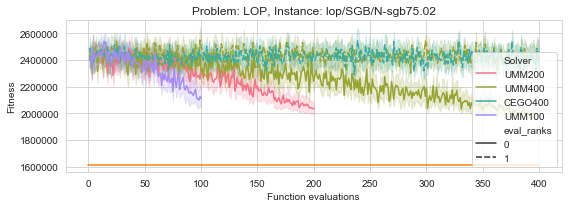

Instance:  lop/RandB/N-p40-02
lop/RandB/N-p40-02 10683.0
Saving to img/fitness_real_lop_RandB_N-p40-02.pdf


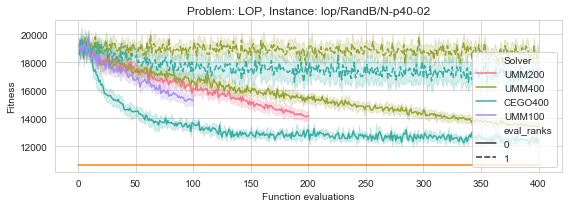

Instance:  lop/RandB/N-p40-01
lop/RandB/N-p40-01 9663.0
Saving to img/fitness_real_lop_RandB_N-p40-01.pdf


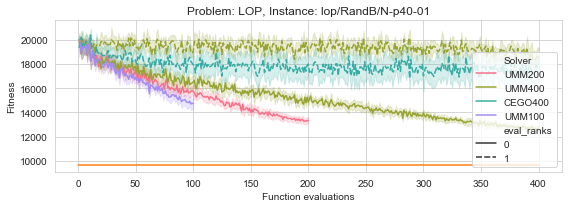

Instance:  pfsp/rec13.txt
pfsp/rec13.txt nan
Saving to img/fitness_real_pfsp_rec13_txt.pdf


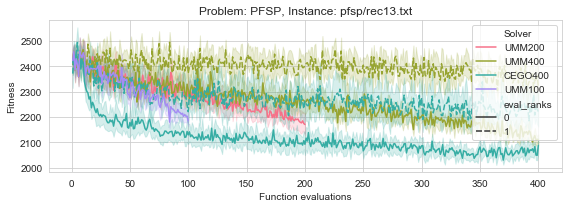

Instance:  pfsp/rec05.txt
pfsp/rec05.txt nan
Saving to img/fitness_real_pfsp_rec05_txt.pdf


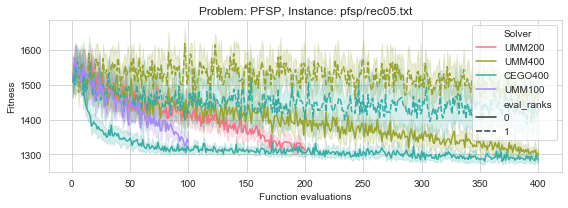

Instance:  pfsp/rec31.txt
pfsp/rec31.txt nan
Saving to img/fitness_real_pfsp_rec31_txt.pdf


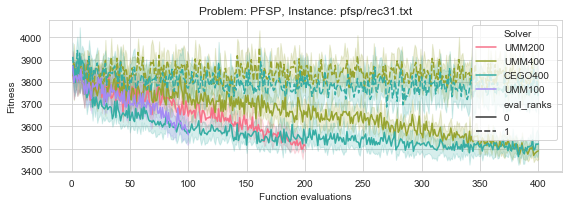

Instance:  pfsp/rec19.txt
pfsp/rec19.txt nan
Saving to img/fitness_real_pfsp_rec19_txt.pdf


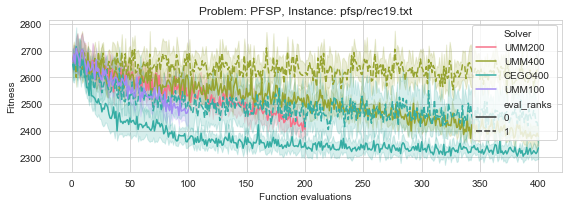

Instance:  lop/RandA1/N-t1d100.01
lop/RandA1/N-t1d100.01 61509.0
Saving to img/fitness_real_lop_RandA1_N-t1d100_01.pdf


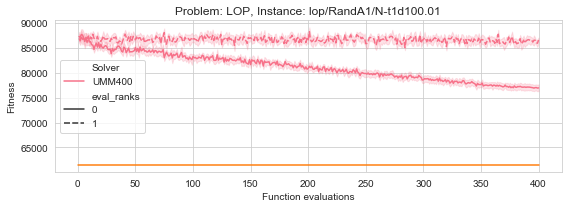

Instance:  lop/RandA1/N-t1d100.02
lop/RandA1/N-t1d100.02 62952.0
Saving to img/fitness_real_lop_RandA1_N-t1d100_02.pdf


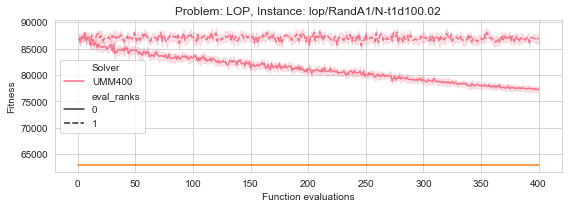

Instance:  lop/xLOLIB/N-be75eec_150
lop/xLOLIB/N-be75eec_150 677365.0
Saving to img/fitness_real_lop_xLOLIB_N-be75eec_150.pdf


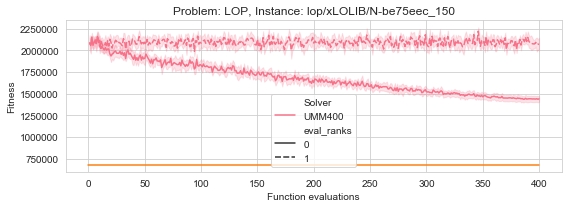

Instance:  lop/xLOLIB/N-be75np_150
lop/xLOLIB/N-be75np_150 1854838.0
Saving to img/fitness_real_lop_xLOLIB_N-be75np_150.pdf


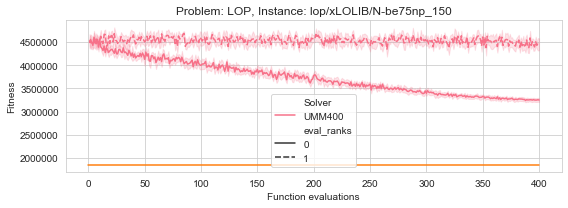

Instance:  lop/Spec/N-pal13
lop/Spec/N-pal13 nan
Saving to img/fitness_real_lop_Spec_N-pal13.pdf


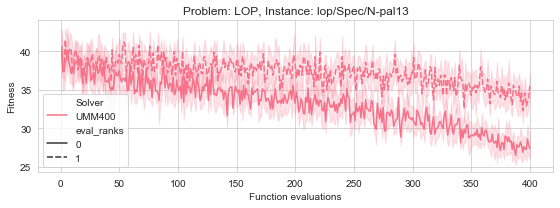

Instance:  lop/Spec/N-pal11
lop/Spec/N-pal11 nan
Saving to img/fitness_real_lop_Spec_N-pal11.pdf


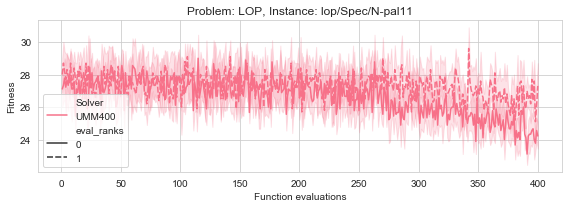

Instance:  lop/MB/N-r100a2
lop/MB/N-r100a2 22391.0
Saving to img/fitness_real_lop_MB_N-r100a2.pdf


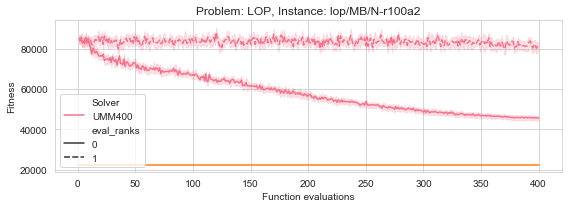

Instance:  lop/MB/N-r100b2
lop/MB/N-r100b2 23048.0
Saving to img/fitness_real_lop_MB_N-r100b2.pdf


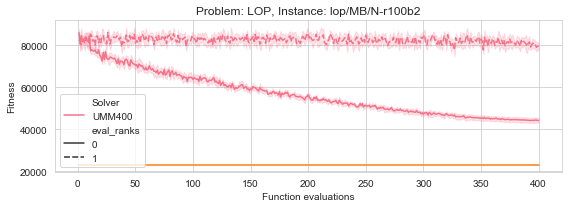

Instance:  lop/RandA2/N-t2d100.02
lop/RandA2/N-t2d100.02 1442.0
Saving to img/fitness_real_lop_RandA2_N-t2d100_02.pdf


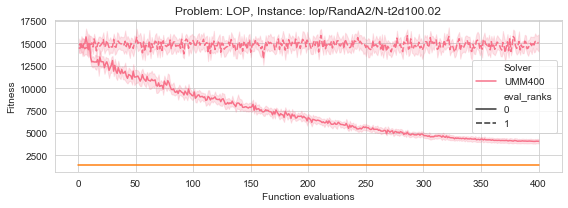

Instance:  lop/RandA2/N-t2d100.01
lop/RandA2/N-t2d100.01 1566.0
Saving to img/fitness_real_lop_RandA2_N-t2d100_01.pdf


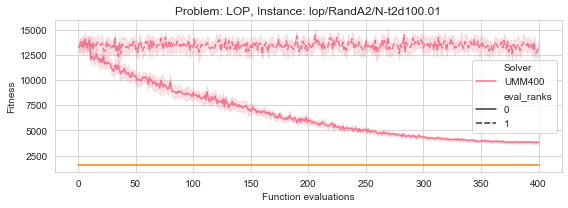

Instance:  qap/tho30.dat
qap/tho30.dat nan
Saving to img/fitness_real_qap_tho30_dat.pdf


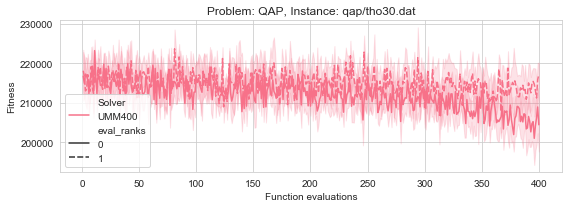

Instance:  qap/kra30a.dat
qap/kra30a.dat nan
Saving to img/fitness_real_qap_kra30a_dat.pdf


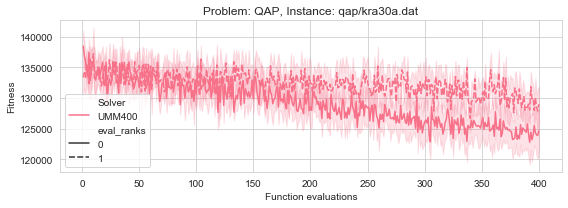

Instance:  qap/nug12.dat
qap/nug12.dat nan
Saving to img/fitness_real_qap_nug12_dat.pdf


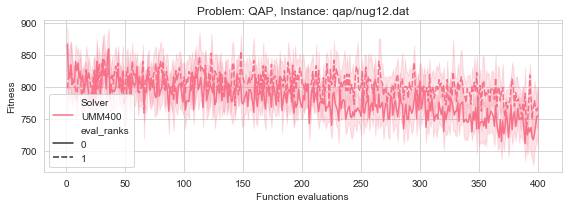

Instance:  qap/kra30b.dat
qap/kra30b.dat nan
Saving to img/fitness_real_qap_kra30b_dat.pdf


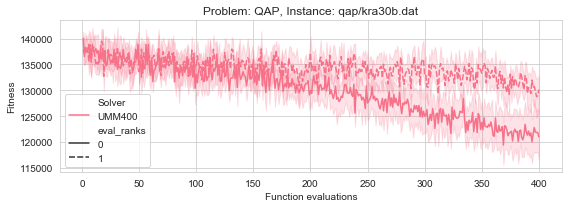

Instance:  qap/kra32.dat
qap/kra32.dat nan
Saving to img/fitness_real_qap_kra32_dat.pdf


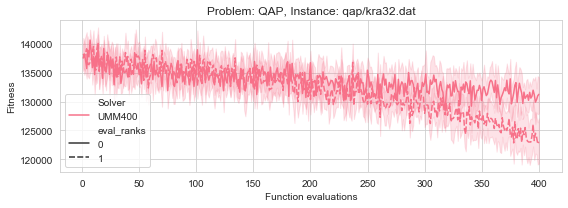

Instance:  qap/nug30.dat
qap/nug30.dat nan
Saving to img/fitness_real_qap_nug30_dat.pdf


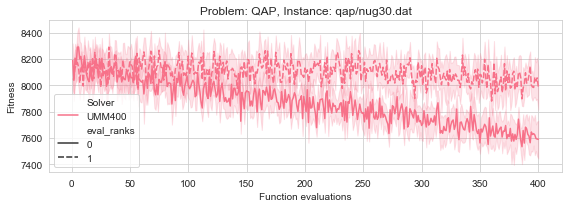

Instance:  lop/RandB/N-p50-01
lop/RandB/N-p50-01 16673.0
Saving to img/fitness_real_lop_RandB_N-p50-01.pdf


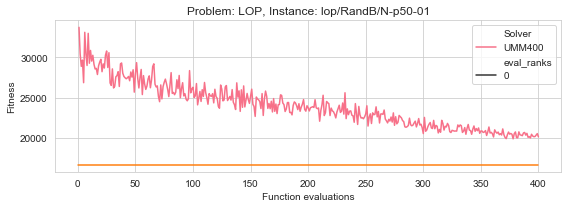

In [4]:
dfreal["Solver"] = (dfreal["Solver"]+dfreal["budget"].astype(str))

for inst in dfreal.instance.drop_duplicates().values:#selected.instance_name:# ['tho30']:# selected.instance_name:
    print("Instance: ", inst)
    df = dfreal[dfreal.instance.str.contains(inst)]
    if len(df) == 0: 
        print("No data for {inst}")
        continue
    val_opt = get_opt(inst)
    plt.figure(figsize=(8,3))
    palette = sns.color_palette("husl", len(df['Solver'].drop_duplicates()))
    g = sns.lineplot(x='Function evaluations',y='Fitness',hue='Solver',style='eval_ranks', data=df, palette=palette)
    if val_opt is not None: 
      print(inst,val_opt)
      plt.plot([0,400],[val_opt,val_opt])
    g.set_title('Problem: ' + df.Problem.iloc[0] + ', Instance: ' + inst)
    plt.tight_layout()
    filename = 'img/fitness_real_' + df.instance.iloc[0].replace('/','_').replace('.','_') + '.pdf'
    print("Saving to " + filename)
    plt.savefig(filename)
    plt.show()

## Summary of the results

Table with the summary of the results

In [7]:
dftime

Solver                            CEGO400  UMM100  UMM200  UMM400  \
Problem instance                                                    
LOP     lop/IO/N-t59b11xx            20.7     0.0     0.1     0.4   
        lop/IO/N-t59d11xx            20.9     0.0     0.1     0.4   
        lop/MB/N-r100a2               NaN     NaN     NaN     1.9   
        lop/MB/N-r100b2               NaN     NaN     NaN     2.1   
        lop/RandA1/N-t1d100.01        NaN     NaN     NaN     2.0   
        lop/RandA1/N-t1d100.02        NaN     NaN     NaN     2.0   
        lop/RandA2/N-t2d100.01        NaN     NaN     NaN     2.0   
        lop/RandA2/N-t2d100.02        NaN     NaN     NaN     1.9   
        lop/RandB/N-p40-01           19.5     0.0     0.1     0.3   
        lop/RandB/N-p40-02           19.7     0.0     0.1     0.3   
        lop/SGB/N-sgb75.01           33.4     0.1     0.3     1.1   
        lop/SGB/N-sgb75.02           32.9     0.1     0.3     1.1   
        lop/Spec/N-pal11              NaN     NaN     NaN     0.0   
        lop/Spec/N-pal13              NaN     NaN     NaN     0.0   
        lop/xLOLIB/N-be75eec_150      NaN     NaN     NaN     4.4   
        lop/xLOLIB/N-be75np_150       NaN     NaN     NaN     4.4   
PFSP    pfsp/rec05.txt               16.1     0.0     0.0     0.1   
        pfsp/rec13.txt               17.4     0.0     0.0     0.1   
        pfsp/rec19.txt               18.1     0.0     0.0     0.2   
        pfsp/rec31.txt               22.8     0.0     0.1     0.5   
QAP     qap/kra30a.dat                NaN     NaN     NaN     0.2   
        qap/kra30b.dat                NaN     NaN     NaN     0.2   
        qap/kra32.dat                 NaN     NaN     NaN     0.2   
        qap/nug12.dat                 NaN     NaN     NaN     0.0   
        qap/nug30.dat                 NaN     NaN     NaN     0.2   
        qap/tho30.dat                 NaN     NaN     NaN     0.2   

Solver                            CEGO F. evaluations  
Problem instance                                       
LOP     lop/IO/N-t59b11xx                         NaN  
        lop/IO/N-t59d11xx                         NaN  
        lop/MB/N-r100a2                           NaN  
        lop/MB/N-r100b2                           NaN  
        lop/RandA1/N-t1d100.01                    NaN  
        lop/RandA1/N-t1d100.02                    NaN  
        lop/RandA2/N-t2d100.01                    NaN  
        lop/RandA2/N-t2d100.02                    NaN  
        lop/RandB/N-p40-01                        NaN  
        lop/RandB/N-p40-02                        NaN  
        lop/SGB/N-sgb75.01                        NaN  
        lop/SGB/N-sgb75.02                        NaN  
        lop/Spec/N-pal11                          NaN  
        lop/Spec/N-pal13                          NaN  
        lop/xLOLIB/N-be75eec_150                  NaN  
        lop/xLOLIB/N-be75np_150                   NaN  
PFSP    pfsp/rec05.txt                            NaN  
        pfsp/rec13.txt                            NaN  
        pfsp/rec19.txt                            NaN  
        pfsp/rec31.txt                            NaN  
QAP     qap/kra30a.dat                            NaN  
        qap/kra30b.dat                            NaN  
        qap/kra32.dat                             NaN  
        qap/nug12.dat                             NaN  
        qap/nug30.dat                             NaN  
        qap/tho30.dat                             NaN

In [12]:
# The maximum time per seed and evaluation is the final time. 
dftime = dfreal.groupby(['Solver','Problem','instance','seed']).run_time.max()
# Then we calculate the mean per instance.
dftime = dftime.groupby(['Solver','Problem','instance']).mean().reset_index()
# Convert to hours
dftime['run_time'] =  (dftime['run_time'] / 3600.0).round(1)
dftime = dftime.pivot_table(index=['Problem','instance'], columns='Solver',values='run_time')
dftime.rename(columns={'CEGO':'CEGO Runtime', 'UMM':'UMM Runtime'}, inplace=True)

# FEvals of CEGO
tmp = dfreal[dfreal['Solver'] == 'CEGO'].groupby(['Problem','instance','seed'])['Function evaluations'].max()
dftime['CEGO F. evaluations'] = tmp.groupby(['Problem','instance']).mean()

# Fitness
df_fitness = dfreal.groupby(['Solver', 'Problem','instance','seed']).Fitness.min().reset_index()
tmp_cego = df_fitness[df_fitness.Solver == 'CEGO'].groupby(['Problem','instance']).Fitness.agg(CEGO_Fitness_mean='mean', CEGO_Fitness_std='std').reset_index()
tmp_umm = df_fitness[df_fitness.Solver == 'UMM'].groupby(['Problem','instance']).Fitness.agg(UMM_Fitness_mean='mean', UMM_Fitness_std='std').reset_index()
df = pd.merge(tmp_cego, tmp_umm)
# Fix instance names
df['Instance'] = [i[-1] for i in df.instance.str.split('/').values]
df['Instance'] = df['Instance'].str.replace('.txt','').str.replace('.dat', '')
df.CEGO_Fitness_mean = df.CEGO_Fitness_mean.round(1)
df.CEGO_Fitness_std = "(" + df.CEGO_Fitness_std.round(1).astype(str) + ")"
df.UMM_Fitness_mean = df.UMM_Fitness_mean.round(1)
df.UMM_Fitness_std = "(" + df.UMM_Fitness_std.round(1).astype(str) + ")"
df = pd.merge(df, dftime, on=['Problem', 'instance'])

df = df.sort_values(['Problem', 'UMM Runtime', 'CEGO Runtime'])

for inst in df.instance:
    x, y = [ f.to_numpy() for _, f in df_fitness[df_fitness.instance == inst].groupby('Solver').Fitness]
    cm = sms.CompareMeans(sms.DescrStatsW(x), sms.DescrStatsW(y))
    df.loc[df.instance == inst, 'Confidence interval'] = str(tuple([i.round(1) for i in cm.tconfint_diff(usevar='unequal')])).replace('(','[').replace(')', ']')
    #df.loc[df.instance == inst, 'Confidence interval'] = str(tuple([i.round(1) for i in cm.tconfint_diff(usevar='unequal')]))

# Keep only some columns
df = df[['Problem', 'Instance','CEGO_Fitness_mean','CEGO_Fitness_std','UMM_Fitness_mean','UMM_Fitness_std','Confidence interval','CEGO F. evaluations','CEGO Runtime','UMM Runtime']]
df#.to_csv('info.csv')

,Problem,Instance,CEGO_Fitness_mean,CEGO_Fitness_std,UMM_Fitness_mean,UMM_Fitness_std,Confidence interval,CEGO F. evaluations,CEGO Runtime,UMM Runtime
2,LOP,N-p40-01,15027.7,(978.4),12369.1,(389.9),"[1931.5, 3385.7]",400.0,19.5,0.3
3,LOP,N-p40-02,15150.2,(791.0),13119.4,(430.7),"[1419.5, 2642.1]",400.0,19.7,0.3
0,LOP,N-t59b11xx,126204.0,(7109.3),112193.0,(3877.6),"[8515.6, 19506.4]",400.0,20.7,0.4
1,LOP,N-t59d11xx,30199.8,(3474.8),16662.9,(2155.3),"[10781.3, 16292.5]",400.0,20.9,0.4
5,LOP,N-sgb75.02,2069286.9,(37990.5),1954723.7,(34983.7),"[80235.6, 148890.8]",400.0,32.9,1.1
4,LOP,N-sgb75.01,2092182.5,(34710.6),1980144.5,(29126.6),"[60895.0, 163181.0]",400.0,33.4,1.1
6,PFSP,rec05,1306.3,(33.2),1275.9,(8.3),"[6.3, 54.5]",400.0,16.1,0.1
7,PFSP,rec13,2096.0,(44.9),2054.3,(16.4),"[8.5, 74.9]",400.0,17.4,0.1
8,PFSP,rec19,2328.4,(57.6),2296.4,(34.2),"[-13.2, 77.2]",400.0,18.1,0.2
9,PFSP,rec31,3512.3,(62.1),3402.8,(31.1),"[62.1, 156.9]",400.0,22.8,0.5


In [57]:
print(df.to_latex(index=False))

\begin{tabular}{llrlrllrrr}
\toprule
Problem &                                      Instance &  CEGO\_Fitness\_mean & CEGO\_Fitness\_std &  UMM\_Fitness\_mean & UMM\_Fitness\_std &   Confidence interval &  CEGO F. evaluations &  CEGO Runtime &  UMM Runtime \\
\midrule
    LOP &                                       N-pal13 &               21.0 &            (0.0) &              25.2 &           (2.3) &          [-5.9, -2.5] &                  400 &           9.3 &          0.0 \\
    LOP &                                       N-pal11 &               20.0 &            (0.0) &              21.3 &           (0.5) &          [-1.6, -1.0] &                  400 &          13.4 &          0.0 \\
    LOP &  LOP-synthetic,seed=123456,n=20,m=200,phi=0.5 &               18.5 &            (0.4) &              18.2 &           (0.5) &           [-0.1, 0.8] &                  400 &          39.0 &          0.1 \\
    LOP &  LOP-synthetic,seed=123456,n=20,m=200,phi=0.9 &               71.6 &        